<a href="https://colab.research.google.com/github/Sankeetha-Elancheliyan/CM2604-ML-CW/blob/main/ML_CW_Decision_Trees_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)

In [ ]:
# Check for null values
print(data.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
dtype: int64


In [ ]:
# Remove null values
data.dropna(inplace=True)

In [ ]:
# Check for duplicates
print(data.duplicated().sum())

391


In [ ]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [ ]:
# Split features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Perform PCA on the training data
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)

In [ ]:
# Get the explained variance ratios and number of features extracted
variance_ratios = pca.explained_variance_ratio_
print(variance_ratios)
n_components = pca.n_components_
print(n_components)

[9.21274116e-01 7.67479940e-02 1.92327161e-03 9.18036385e-06
 6.47669894e-06]
5


In [ ]:
# Create a scatter plot of PC1 and PC2
# import matplotlib.pyplot as plt
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.5)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title('PCA of SpamBase Dataset')
# plt.show()

In [ ]:
# Train a Decision Tree Classifier on the PCA-transformed data
dtc = DecisionTreeClassifier()
dtc.fit(X_train_pca, y_train)

DecisionTreeClassifier()

In [ ]:
# Apply PCA to the test data
X_test_pca = pca.transform(X_test)

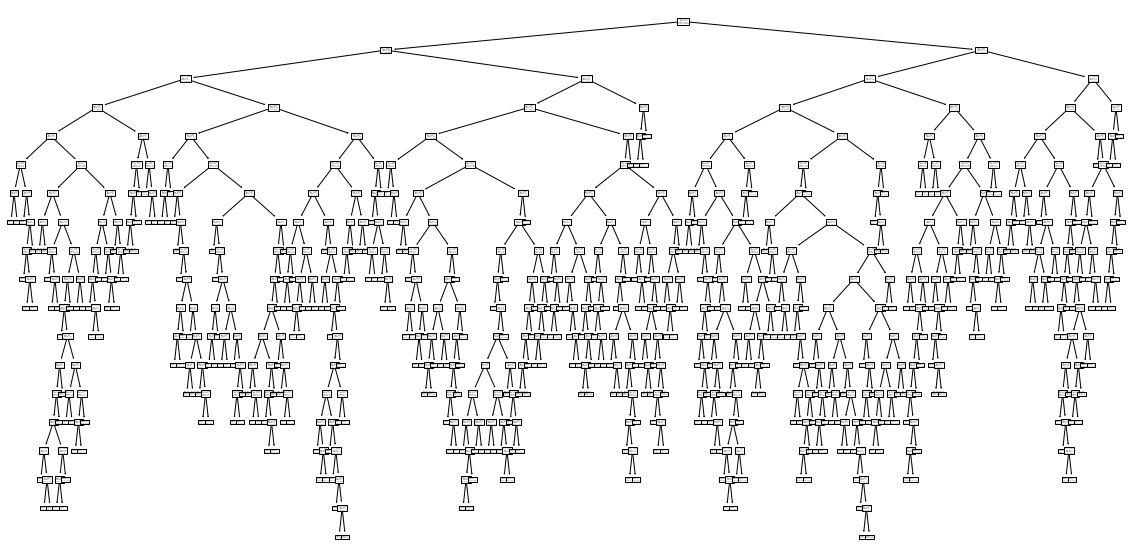

In [ ]:
from sklearn import tree
# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dtc)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Evaluate the model on the test data
y_pred = dtc.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Print the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 Score: {:.2f}%".format(f1*100))
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 81.35%
Precision: 79.02%
Recall: 76.60%
F1 Score: 77.79%
Confusion Matrix:
 [[410  73]
 [ 84 275]]
